# Análisis de Y.Afisha

# Descripción del proyecto
Haciendo prácticas en el departamento analítico de Y.Afisha. Tu primera tarea es ayudar a optimizar los gastos de marketing.  
Se dispone de:  
-- Registros del servidor con datos sobre las visitas a Y.Afisha desde  de 2017 hasta  2018.  
-- Archivos con todos los pedidos del período.  
-- Estadísticas de gastos de marketing.

# Contenido

* [Objetivos](#objetivos)
* [Etapas](#etapas)
* [Diccionario de Datos](#diccionario)
* [1 Inicialización](#inicio)
* [2 Cargar datos](#cargar_datos)
    * [2.1 Descarga de una pequeña porción de datos](#porcion)
    * [2.2 Descarga Completa de Datos Optimizados](#datos_op)
    * [2.3 Estilo del encabezado](#header_style)
* [3 Informe del Producto ](#informe_producto)
* [4 Informe de Ventas](#informe_ventas)
* [5 Informe de Marketing](#informe_marketing)
* [6 Resumen y Conclusión General](#end)

# Objetivos <a id='objetivos'></a>  

* Obtener una comprensión general de los datos.  
* Identificar tendencias y patrones importantes.  
* Preparar los datos para un análisis más detallado.  
* Cómo la gente usa el producto.  
* Cuándo empiezan a comprar.  
* Cuánto dinero trae cada cliente.


# Etapas <a id='etapas'></a>  

Se tiene un dataset con la información necesaria sobre el departamento analítico de Y.Afisha, no hay información previa sobre la calidad de los datos, por lo tanto se revisará antes de comenzar a analizar los datos. 

Pasos a realizar:
1. Importar las librerías necesarias
2. Descripción de los datos, leer y guardar el Dataset con Pandas de manera optimizada.  
3. Procesamiento de los datos, preparar los datos para que sean analizados.
4. Análisis de datos y creación de gráficos.

# Diccionario de Datos <a id='diccionario'></a>   

* La tabla visits (registros del servidor con datos sobre las visitas al sitio web):  
    * Uid: identificador único del usuario;  
    * Device: dispositivo del usuario;  
    * Start Ts: fecha y hora de inicio de la sesión;  
    * End Ts: fecha y hora de término de la sesión;  
    * Source Id: identificador de la fuente de anuncios de la que proviene el usuario.  
    * Todas las fechas de esta tabla están en formato AAAA-MM-DD.  
* La tabla orders (datos sobre pedidos):  
    * Uid: identificador único del usuario que realiza un pedido;  
    * Buy Ts: fecha y hora del pedido;  
    * Revenue: ingresos de Y.Afisha de este pedido.  
* La tabla costs (datos sobre gastos de marketing):  
    * source_id: identificador de la fuente de anuncios  
    * dt: fecha;  
    * costs: gastos en esta fuente de anuncios en este día.

## Inicialización <a id='inicio'></a>

In [77]:
# se cargan todas las librerías
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Cargar datos <a id='cargar_datos'></a>

### Descarga de una pequeña porción de datos <a id='porcion'></a>

In [2]:
# se descargan las primeras 200 filas de cada archivo para revisar que cada columna contenga el tipo de datos correcto
# Y con base en lo anterior optimizar los datos para el análisis

visits_log_us = pd.read_csv('files/datasets/visits_log_us.csv', nrows=200)
orders_log_us = pd.read_csv('files/datasets/orders_log_us.csv', nrows=200)
costs_us = pd.read_csv('files/datasets/costs_us.csv', nrows=200)

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
Se imprimen las primeras 5 filas de cada DataFrame y despues la información con `info()` para revisar el tipo de dato para cada columna.
    
</span>
    
</div>


In [3]:
# DataFrame sobre las visitas
visits_log_us.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
# DataFrame sobre las visitas
visits_log_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     200 non-null    object
 1   End Ts     200 non-null    object
 2   Source Id  200 non-null    int64 
 3   Start Ts   200 non-null    object
 4   Uid        200 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 7.9+ KB


In [5]:
# DataFrame sobre las ordenes
orders_log_us.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [6]:
# DataFrame sobre las ordenes
orders_log_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   200 non-null    object 
 1   Revenue  200 non-null    float64
 2   Uid      200 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.8+ KB


In [7]:
# DataFrame sobre los costos
costs_us.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [8]:
costs_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  200 non-null    int64  
 1   dt         200 non-null    object 
 2   costs      200 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.8+ KB


<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
Cada DataFrame tiene columnas con tipo de datos object y son columnas que tienen fechas, sólo la columna `Device` del DataFrame `visits_log_us` no son fechas, por lo tanto, para esta columna se revisará cuantas categorías tiene y se convertirá al tipo de dato 'category'. Las columnas de fecha se convertirán al tipo de dato datetime con `to_datetime`.
    
</span>
    
</div>

In [9]:
# se busca la cantidad de valores únicos en la columna 'Device' del DataFrame 'visits_log_us' 
# se emplea el método value_counts()
visits_log_us['Device'].value_counts()

desktop    147
touch       53
Name: Device, dtype: int64

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
Sólo se tienen dos categorías, entonces cuando se descarguen todos los datos de cada DataFrame se hará con los tipos de datos correctos.  
También, en los DataFrame `visits_log_us` y `orders_log_us` los nombres de las columnas no tienen el formato **snake_case**, lo anterior se corrgirá en pasos posteriores.
    
</span>
    
</div>

### Descarga Completa de Datos Optimizados  <a id='datos_op'></a>

In [10]:
# se descargan los datos completos con los tipos de datos correctos
visits_log_us = pd.read_csv('/datasets/visits_log_us.csv', dtype= {'Device': 'category'}, parse_dates= ['Start Ts', 'End Ts'])
orders_log_us = pd.read_csv('/datasets/orders_log_us.csv', parse_dates= ['Buy Ts'])
costs_us = pd.read_csv('/datasets/costs_us.csv', parse_dates= ['dt'])

In [11]:
#se revisa la información de los datos de las visitas
visits_log_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [12]:
#se revisa la información de los datos de las ordenes
orders_log_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [13]:
#se revisa la información de los datos de los costos
costs_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


### Estilo del encabezado <a id='header_style'></a>

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
Se cambian los encabezados de los DataFrame `visits_log_us` y `orders_log_us` con el formato snake_case.  
    
</span>
    
</div>

In [14]:
#  se usa el atributo columns para obtener una lista con los nombres de las columnas de 'visits_log_us'
col_names_visits = visits_log_us.columns
col_names_visits

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

In [15]:
#  se usa el atributo columns para obtener una lista con los nombres de las columnas de 'orders_log_us'
col_names_orders = orders_log_us.columns
col_names_orders

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')

In [16]:
# se crea una función para cambiar los nombres de las columnas a minúscula y sustituir los espacios por '_'
def underscore_lower_names(column_names):
    '''
    Función que pone los caracteres en minúscula y los espacios los reemplaza por guión bajo ('_').
    '''
    lower_col_names = [] # se define una nueva lista vacia para guardar los nuevos nombre de las columnas en minúscula
    for col in column_names:
        lower_names = col.lower()
        lower_col_names.append(lower_names)
    
    under_col_names = [] # se define una nueva lista vacia para guardar los nuevos nombre de las columnas con '_'

    for col in lower_col_names:
        underscore_col_names = col.replace(' ', '_')
        under_col_names.append(underscore_col_names)
        
    return under_col_names
    

In [17]:
# se corrigen los nombres de las columnas del DataFrame 'visits_log_us' 
new_visits_names = underscore_lower_names(col_names_visits)
# Se asignan los nuevos nombres de columna
visits_log_us.columns = new_visits_names
visits_log_us.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [18]:
# se corrigen los nombres de las columnas del DataFrame 'orders_log_us' 
new_orders_names = underscore_lower_names(col_names_orders)
# Se asignan los nuevos nombres de columna
orders_log_us.columns = new_orders_names
orders_log_us.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

### Valores ausentes y duplicados <a id='missing_duplicated_values'></a>

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
Se verifica si hay valores ausentes y duplicados para cada DataFrame.
    
</span>
    
</div>


In [19]:
# Valores ausentes en el DataFrame de visitas
visits_log_us.isna().sum()

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

In [20]:
# Valores duplicados en el DataFrame de visitas
visits_log_us.duplicated().sum()

0

In [21]:
# Valores ausentes en el DataFrame de ordenes
orders_log_us.isna().sum()

buy_ts     0
revenue    0
uid        0
dtype: int64

In [22]:
# Valores duplicados en el DataFrame de ordenes
orders_log_us.duplicated().sum()

0

In [23]:
# Valores ausentes en el DataFrame de costos
costs_us.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [24]:
# Valores duplicados en el DataFrame de costos
costs_us.duplicated().sum()

0

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
No hay valores ausentes ni duplicados en los DataFrame, por lo tanto los datos están listos para su análisis.
    
</span>
    
</div>

## Informe del Producto <a id='informe_producto'></a>

In [25]:
# se imprimen las 5 filas del DataFrame visits_log_us
visits_log_us.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
Para saber cuántas personas usan el sevidor cada día, semana y mes; primero se crea una columna para el año, mes, semana y día en el DataFrame `visits_log_us`. Con `dt` se extrae el dato de la fecha de interes.
    
</span>
    
</div>

In [26]:
# se crean las nuevas columnas
visits_log_us['session_year'] = visits_log_us['start_ts'].dt.year
visits_log_us['session_month'] = visits_log_us['start_ts'].dt.month
visits_log_us['session_week'] = visits_log_us['start_ts'].dt.isocalendar().week
visits_log_us['session_date'] = visits_log_us['start_ts'].dt.date

In [27]:
# se imprimen las 3 filas del DataFrame visits_log_us
visits_log_us.head(3)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01


<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
Se calcula el número de usuarios que usan el servicio por día, mes y semana, que sería el DAU, MAU y WAU, respectivamente. 
- **DAU**: el número de usuarios activos diarios (únicos);
- **WAU**: el número de usuarios activos semanales;
- **MAU**: el número de usuarios activos mensuales.
    
</span>
    
</div>

In [28]:
# Agruparemos los datos por fecha del día de la sesión y buscaremos la media
dau_total = visits_log_us.groupby(['session_date']).agg({'uid': 'nunique'}).mean().round()
dau_total

uid    908.0
dtype: float64

In [29]:
# Agruparemos los datos por semana de la sesión y buscaremos la media
wau_total = visits_log_us.groupby(['session_week']).agg({'uid': 'nunique'}).mean().round()
wau_total

uid    5825.0
dtype: float64

In [30]:
# Agruparemos los datos por mes de la sesión y buscaremos la media
mau_total = visits_log_us.groupby(['session_month']).agg({'uid': 'nunique'}).mean().round()
mau_total

uid    23228.0
dtype: float64

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
Para saber con que frecuancia los usuarios y usuarias regresan, se calcula el Factor de Adherencia. Esta métrica nos dice qué tan leal es la audiencia, con qué frecuencia regresan a la aplicación o servicio. El factor de adherencia (sticky factor) se calcula: `DAU/WAU` o `DAU/MAU`.
    
</span>
    
</div>

In [31]:
# calcula el factor de adherencia semanal
sticky_wau = dau_total / wau_total
sticky_wau

uid    0.15588
dtype: float64

In [32]:
# calcula el factor de adherencia semanal
sticky_mau = dau_total / mau_total
sticky_mau

uid    0.039091
dtype: float64

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
Se calcula el número de sesiones por día y el número de usuarios por día. También la duración de cada sesión y el número de sesiones por usuario.
    
</span>
    
</div>

In [33]:
# se usa groupby() y la función agg() para contabilizar el total de las sesiones por día y 
# el número de usuarios únicos por día
sessions_per_user = visits_log_us.groupby(['session_year', 'session_date']).agg({'uid': ['count', 'nunique']})
# se renombran las columnas 
sessions_per_user.columns = ['n_sessions', 'n_users']
# se imprimen 5 filas del resultado
sessions_per_user.head()

n_sessions  n_users
session_year session_date                     
2017         2017-06-01           664      605
             2017-06-02           658      608
             2017-06-03           477      445
             2017-06-04           510      476
             2017-06-05           893      820

In [34]:
# se calcula el número de sesiones por usuario, dividiendo el número de sesiones entre el número de usuarios
# se crea una nueva columna para almacenar el resultado
sessions_per_user['sess_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
# se muestran 5 filas
sessions_per_user.head()

n_sessions  n_users  sess_per_user
session_year session_date                                    
2017         2017-06-01           664      605       1.097521
             2017-06-02           658      608       1.082237
             2017-06-03           477      445       1.071910
             2017-06-04           510      476       1.071429
             2017-06-05           893      820       1.089024

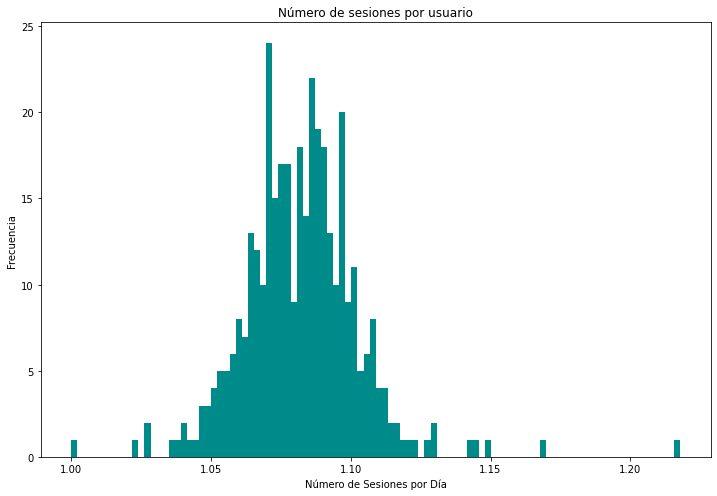

In [35]:
# se grafica un histograma para observar la distribución del número de sesiones por usuario para cada día

sessions_per_user['sess_per_user'].plot(kind= 'hist',
                                        bins= 100,
                                       title= 'Número de sesiones por usuario',
                                       figsize= (12, 8),
                                       color= 'darkcyan'
                                       )
plt.xlabel('Número de Sesiones por Día')
plt.ylabel('Frecuencia')
plt.show()

In [36]:
# se calcula la moda para el número de sesiones más frecuente por día
sessions_per_user['sess_per_user'].mode()

0    1.071429
dtype: float64

In [37]:
# se calculan la duración de las sesiones, se crea una nueva columna en el DataFrame 'visits_log_us'
visits_log_us['session_duration_min'] = (visits_log_us['end_ts'] - visits_log_us['start_ts']).dt.seconds
# se transforman los segundos a minutos
visits_log_us['session_duration_min'] = visits_log_us['session_duration_min'] / 60
# se imprimen las primeras 5 filas
visits_log_us.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_min
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,18.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,28.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,24.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0.0


<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
Se observa que hay sesiones con una larga duración, por tanto, se calcularan sus estadísticos descriptivos con `describe()` para esta columna y se graficará un histograma.
    
</span>
    
</div>

In [38]:
visits_log_us['session_duration_min'].describe()

count    359400.000000
mean         10.725108
std          16.938913
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max        1408.000000
Name: session_duration_min, dtype: float64

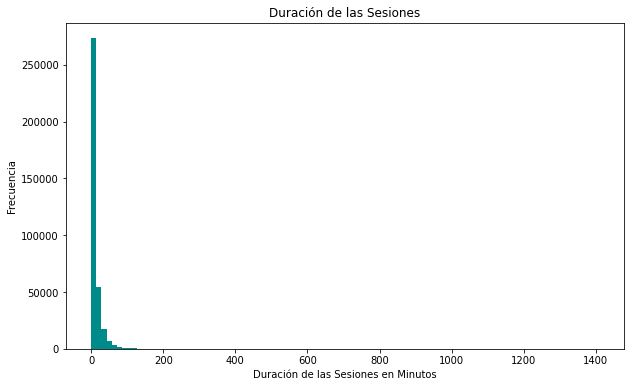

In [39]:
# ahora se grafica un histograma para observar la distribución de la duración de las sesiones
visits_log_us['session_duration_min'].plot(kind= 'hist',
                                        bins= 100,
                                       title= 'Duración de las Sesiones',
                                       figsize= (10, 6),
                                       color= 'darkcyan'
                                       )
plt.xlabel('Duración de las Sesiones en Minutos')
plt.ylabel('Frecuencia')
plt.show()


<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
**Observaciones:**  
A partir de los estadísticos descritivos se puede observar que probablemente hay valores atípicos, ya que el valor máximo de las duración de una sesión es de 1408 minutos. Lo anterior se confirma con el histograma, ya no tiene una distribución normal, por lo tanto, se busca la moda para saber la duración media de la sesión.
    
</span>
    
</div>

In [40]:
# se encuentra la moda con mode() para conocer la duración media de la sesión
visits_log_us['session_duration_min'].mode()

0    1.0
dtype: float64

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
**Conclusiones:**  
La cantidad de usuarios activos diarios son de 908, a la semana 5,825 y al mes son 23,228. El factor de adherencia semanal es de 0.155, lo que nos dice que los usuarios interactuan con el servicio el 15.5 % de los días de las semana.  El factor de adherencia es bajo, por tanto, la frecuencia con la que los usuarios regresan a la semana se pueden mejorar. Por otro lado, el factor de adherencia mensual es es de 3.9 %, el cuál es muy bajo, también hay mucha área de oprtunidad para mejor dicho factor si el departamento de markenting desea aumentar la cantidad de los usuarios que regresan.  
El número de sesiones diarias es de 1 aproximadamente, mientras que, la duración media de las sesiones es de 1 minuto. Hay valores para la duración de las sesión de 1408 minutos, aquí es importante revisar si son valores atípicos o sin los usuarios o usuarias dejaron abiertas sus sesiones.

    
</span>
    
</div>

## Informe de Ventas <a id='informe_ventas'></a>

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
Para saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Entonces se empleara el DataFrame `visits_log_us` para encontrar el primer registro (columna `start_ts`) y el DataFrame `orders_log_us` para encontrar la primera orden (columna `buy_ts`). Después se calcula la diferencia entre ambas fechas 


    
</span>
    
</div>

In [41]:
# agregar columna de mes de inicio de sesión en DataFrame 'visits_log_us'
# y en el DataFrame 'orders_log_us' la columna de mes de pedido
visits_log_us['session_month'] = visits_log_us['start_ts'].astype('datetime64[M]')
orders_log_us['order_month'] = orders_log_us['buy_ts'].astype('datetime64[M]')

In [42]:

# se busca la primer sesión para cada usuario
first_session_dates = visits_log_us.groupby('uid')['session_month'].min().reset_index()
# se cambia el nombre de la columna 
first_session_dates.columns = ['uid', 'first_session_month']
first_session_dates.head()

,uid,first_session_month
0,11863502262781,2018-03-01
1,49537067089222,2018-02-01
2,297729379853735,2017-06-01
3,313578113262317,2017-09-01
4,325320750514679,2017-09-01


In [43]:
# se una al DataFrame 'visits_log_us' con merge
visits_log_us_ = visits_log_us.merge(first_session_dates, on= 'uid')
visits_log_us_.head(3)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_min,first_session_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,18.0,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,28.0,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,0.0,2017-07-01


In [44]:
# se busca la fecha para la primera orden para cada usuario
first_buy_dates = orders_log_us.groupby('uid')['order_month'].min().reset_index()
# se cambia el nombre de la columna 
first_buy_dates.columns = ['uid', 'first_buy_month']
first_buy_dates.head()

,uid,first_buy_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [45]:
# se una al DataFrame 'orders_log_us' con merge
orders_log_us_ = orders_log_us.merge(first_buy_dates, on= 'uid')
orders_log_us_.head(3)

,buy_ts,revenue,uid,order_month,first_buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01


In [46]:
# se unen los DataFrame 'visits_log_us_' con 'orders_log_us_'
visits_orders = visits_log_us_.merge(orders_log_us_, on= 'uid')
visits_orders.head(3)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_min,first_session_month,buy_ts,revenue,order_month,first_buy_month
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,24.0,2018-03-01,2018-03-09 20:25:00,2.33,2018-03-01,2018-03-01
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-01,10,2018-03-09,28.0,2018-03-01,2018-03-09 20:25:00,2.33,2018-03-01,2018-03-01
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,2017-09-01,35,2017-09-03,1.0,2017-09-01,2017-09-04 12:46:00,2.44,2017-09-01,2017-09-01


In [47]:
# se calcula los días trancurridos cuando el/la usuario/a se convierte en cliente
visits_orders['convertion_time_days'] = (visits_orders['first_buy_month'] - visits_orders['first_session_month']).dt.days
visits_orders.head(3)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_min,first_session_month,buy_ts,revenue,order_month,first_buy_month,convertion_time_days
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,24.0,2018-03-01,2018-03-09 20:25:00,2.33,2018-03-01,2018-03-01,0
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-01,10,2018-03-09,28.0,2018-03-01,2018-03-09 20:25:00,2.33,2018-03-01,2018-03-01,0
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,2017-09-01,35,2017-09-03,1.0,2017-09-01,2017-09-04 12:46:00,2.44,2017-09-01,2017-09-01,0


<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
Se categorizan los días, para esto se definen los intervalos  en los cuales categorizarán los valores de tiempo de conversión de la columna `convertion_time_days` y se guardan en `bins`. En la variable `labels` se alamcenan los nombres de las etiquetas para cada uno de los intervalos definidos en `bins`. Después se emplea la función `cut()` para asignar cada valor de `convertion_time_days` al intervalo adecuado según los límites definidos en bins, y luego se le asigna la etiqueta correspondiente de labels. 
    
</span>
    
</div>

In [48]:
# se categoriza el tiempo de conversión
bins = [-1, 0, 1, 7, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360]  # Definir los intervalos 
labels = ['Conversion 0d', 'Conversion 1d', 'Conversion 1w', 'Conversion 1m', 'Conversion 2m', 'Conversion 3m', 'Conversion 4m', 'Conversion 5m', 'Conversion 6m', 'Conversion 7m', 'Conversion 8m', 'Conversion 9m', 'Conversion 10m', 'Conversion 11m', 'Conversion 12m']
visits_orders['conversion_category'] = pd.cut(visits_orders['convertion_time_days'], bins=bins, labels=labels)
# se imprime una muestra de filas
visits_orders.sample(5)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_min,first_session_month,buy_ts,revenue,order_month,first_buy_month,convertion_time_days,conversion_category
212797,desktop,2017-10-29 13:18:00,2,2017-10-29 13:08:00,11920452646463905188,2017,2017-10-01,43,2017-10-29,10.0,2017-06-01,2017-10-12 11:50:00,3.30,2017-10-01,2017-06-01,0,Conversion 0d
749561,desktop,2017-12-12 11:59:00,1,2017-12-12 11:01:00,1502289719776117431,2017,2017-12-01,50,2017-12-12,58.0,2017-12-01,2017-12-12 09:50:00,6.42,2017-12-01,2017-12-01,0,Conversion 0d
449843,desktop,2017-12-20 19:56:00,1,2017-12-20 19:52:00,14965030714373758003,2017,2017-12-01,51,2017-12-20,4.0,2017-06-01,2018-03-01 16:46:00,33.00,2018-03-01,2017-11-01,153,Conversion 6m
255317,desktop,2018-03-20 16:37:00,5,2018-03-20 16:28:00,11920452646463905188,2018,2018-03-01,12,2018-03-20,9.0,2017-06-01,2018-01-10 12:01:00,1.95,2018-01-01,2017-06-01,0,Conversion 0d
89985,desktop,2018-04-18 16:54:00,2,2018-04-18 16:40:00,3263486045884611639,2018,2018-04-01,16,2018-04-18,14.0,2017-06-01,2017-07-04 17:20:00,36.67,2017-07-01,2017-06-01,0,Conversion 0d


In [49]:
# ahora se crea una tabla dinámica para saber la cantidad de pedidos que hicieron los usuarios por cohorte (que son los que 
# se registracion por primera vez) y el tiempo que tardaron en hacer su primer pedido 'conversion_category'
first_session_cohort = visits_orders.pivot_table(index= 'first_session_month',
                                       columns= 'conversion_category',
                                       values= 'uid',
                                       aggfunc= 'nunique')

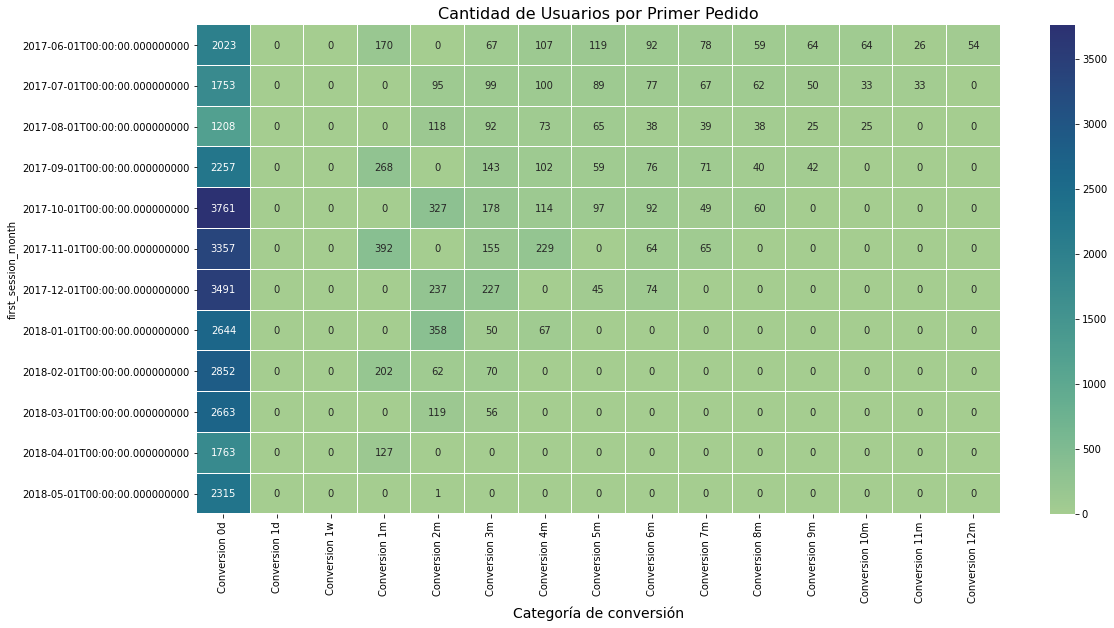

In [50]:
# se grafica un mapa de calor a partir de orders_pivot
plt.figure(figsize=(18, 9))

sns.heatmap(first_session_cohort, annot=True, fmt='g', cmap="crest", linewidth=.01)

plt.title('Cantidad de Usuarios por Primer Pedido', fontsize= 16)
plt.xlabel('Categoría de conversión', fontsize= 14)


plt.show()

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
**Conclusiones:**  
En en mapa de calor anterior muestra que los cohortes por primer inicio de sesión y la cantidad de usuarios que se hicieron su primer pedido por categoría de conversión, desde 0 días hasta 12 meses.  
Se observa que para todas las cohortes los usuarios y usuarias hicieron su primer pedido el mismo día, (Conversion d). Las cohortes de octubre, noviembre y diciembre del 2017 tienen la mayoría de usuarios y usuarias que hicieron su primer pedido el mismo día, 3761, 3357 y 3491, respectivamente; probablemente es debido a la temporada, ya que se celebran diferentes festividades, por lo que los/las clientes pueden necesitar lo más pronto el producto.  
También se observa que en algunas cohortes los y las clientes tardaron un mes en realizar su primer pedido y en otros hasta 4 meses; la cohorte de junio de 2017 es la única que tiene 54 usuarios que hicieron su primer pedido despues de 12 meses. Las usuarias y usurios del cohorte de mayo del 2018 la mayoría hizo su primer pedido el mismo día.   

    
</span>
    
</div>

In [51]:
# Ahora las cohortes se definen por el periodo de tiempo de conversión
# se emplea una tabla dinámica para saber la cantidad de pedidos que hicieron de acuerdo a la fuente del anuncio
convertion_time_cohort = visits_orders.pivot_table(index= 'conversion_category',
                             columns= 'source_id',
                             values= 'uid',
                             aggfunc= 'nunique')

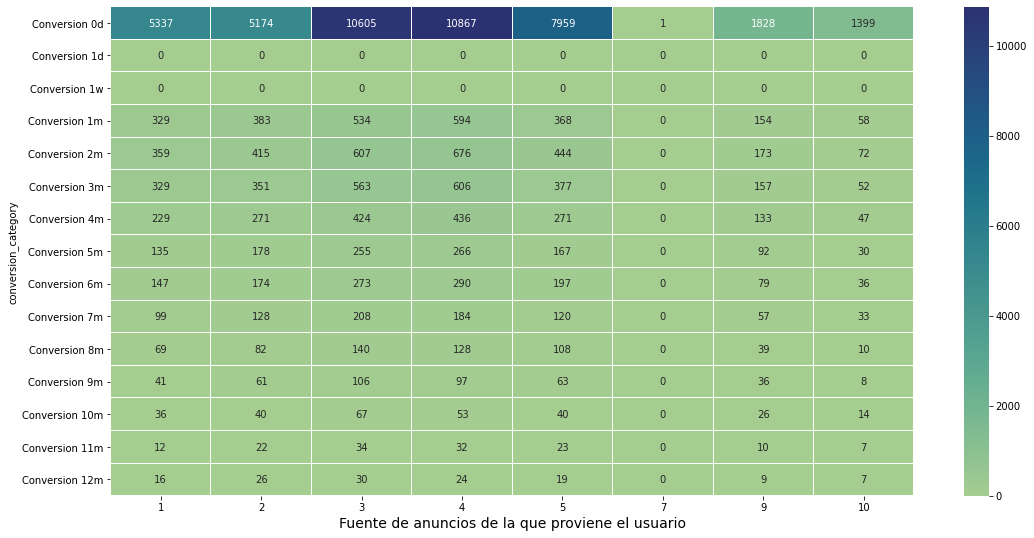

In [52]:
# se grafica un mapa de calor a partir de convertion_time_cohort
plt.figure(figsize=(18, 9))

sns.heatmap(convertion_time_cohort, annot=True, fmt='g', cmap="crest", linewidth=.01)

plt.title('', fontsize= 16)
plt.xlabel('Fuente de anuncios de la que proviene el usuario', fontsize= 14)


plt.show()

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
**Conclusiones:**  
En el mapa de calor anterior los usuarios se organizaron en cohortes de acuerdo a su periodo/tiempo de conversión, en el cohorte de 0 días la mayor cantidad de primeros pedidos fueron principalmente de tres fuentes: de la 4, 3 y 5.  
Para las cohortes de 1 mes, 2, 3 y 4 meses, son las misma fuentes de anuncios las que tienen la mayoría de usuarios. La fuente 7 practicamente no genera primeras compras, sólo 1, por tanto no sería mala idea no usar más esa fuente de anuncios; por tanto, valdría más la pena centrar más esfuerzos en las fuentes 3, 4 y 5. También las fuentes de anuncios 1 y 2 genera una importante cantidad de primeras compras.  

    
</span>
    
</div>

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
****  
Ahora se calcula el total de pedidos para cada mes que se realizó la compra/pedido, también se calcula el promedio de pedidos que hizo cada usuario por mes. Se emplea el DataFrame `orders_log_us`.

    
</span>
    
</div>

In [53]:
# se agrupan los datos por mes de compra
order_period = orders_log_us.groupby(['order_month'])['uid'].agg(['count', 'nunique']).reset_index()
# se cambia el nombre de las columnas
order_period.columns = ['order_month', 'n_orders', 'n_users']
# se crea una columna para las ordenes por usuario
order_period['orders_per_user'] = order_period['n_orders'] / order_period['n_users']
order_period.head()

,order_month,n_orders,n_users,orders_per_user
0,2017-06-01,2354,2023,1.163618
1,2017-07-01,2363,1984,1.191028
2,2017-08-01,1807,1472,1.227582
3,2017-09-01,3387,2750,1.231636
4,2017-10-01,5679,4675,1.214759


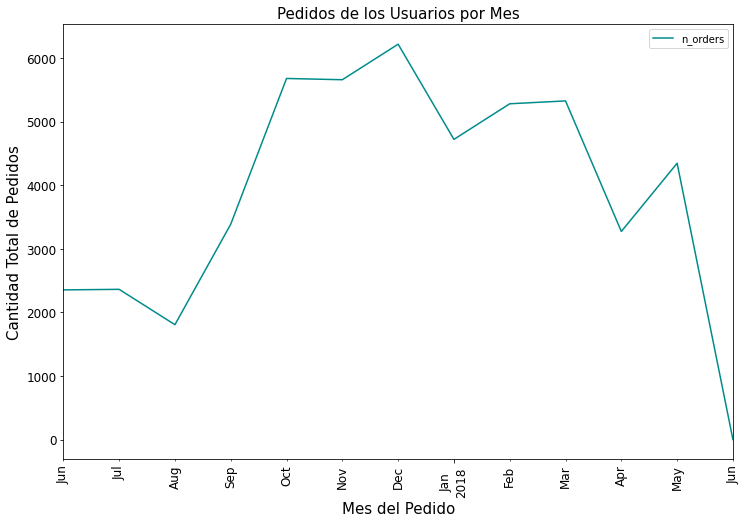

In [54]:
# Se grafica los pedidos totales para cada mes donde se efectuo la compra
order_period.plot(x = 'order_month',
                  y= 'n_orders',
                  kind= 'line',
                  figsize= [12,8],
                  fontsize= 12,
                  rot= 90,
                  color= 'darkcyan'
                       )
plt.title('Pedidos de los Usuarios por Mes', fontsize=15)
plt.xlabel('Mes del Pedido', fontsize=15)
plt.ylabel('Cantidad Total de Pedidos', fontsize=15)


plt.show()

In [55]:
# Se calcula el promedio de los pedidos y el promedio de pedidos por usuario/a 
total_orders_mean = order_period['n_orders'].mean().round()
orders_per_user_mean = order_period['orders_per_user'].mean().round()
print(f'El promedio de pedidos que se hacen de {total_orders_mean}')
print(f'Los pedidos en promedio que se hacen por usuario/a son de {orders_per_user_mean}')

El promedio de pedidos que se hacen de 3878.0
Los pedidos en promedio que se hacen por usuario/a son de 1.0


<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
**Conclusiones:**  
La cantidad de pedidos que hicieron los usuarios es mayor en los meses de octubre, noviembre y diciembre de 2017, siendo diciembre el mes con más pedidos con 6,000 pedidos aproximadamente; se puede deber a que son meses en los cuales se celebran varias festiviadades en la cuales las personas dan regalos. Después la cantidad de pedidos disminuye hay un ligero repunte en febrero y marzo del 2018, pero después vuelven a disminuir. En promedio cada usuario y usuaria hacen 1 pedido.
    
</span>
    
</div>

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
****  
Para calcular el LTV (la cantidad total de dinero que un cliente aporta a la empresa en promedio al realizar compras), se agrupan los datos por clientes con la fecha de su primera compra a partir del DataFrame `orders_log_us`, por tanto los/las clientes se organizan por cohorte por fecha de primer pedido. Después se agrupan por fecha de la cohorte y se calcula la cantidad de usuarios y usuarias únicos/as. Luego el DataFrame que tiene las fechas de las cohortes se agregan al DataFrame `orders_log_us` con `merge`, enseguida se agrupan los datos por cohorte y por la fecha de compra (mes de compra) y se calcula el total de ganancias (revenue) para cada grupo. 
    
</span>
    
</div>

In [56]:
# se grupan los datos por id de usuario y se busca la fecha de su primer pedido con min()
first_orders = orders_log_us.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [57]:
# se calcula el tamaño de la cohorte contando los usuarios y usuarias únicos/as para cada cohorte
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
# Cambia el nombre de las columnas
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [58]:
# se agregan los meses de la primera compra de los clientes y clientas al DataFrame orders_log_us
orders_with_first_order = orders_log_us.merge( first_orders, on= 'uid')
orders_with_first_order.head()

,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [59]:
# se agrupan los datos por fecha de la cohorte y el mes de la compra y se calculan las ganancias totles con sum()
cohorts = orders_with_first_order.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [60]:
# se hace un merge de los DataFrame 'cohort_sizes' y 'cohorts'
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [61]:
# se crea una columna para calcular la edad de cada cohorte
report['age'] = report['order_month'] - report['first_order_month']
# se cambia a meses
report['age'] = report['age'] / np.timedelta64(1, 'M')
# se redondean los meses
report['age'] = report['age'].round().astype('int')
report.head()

,first_order_month,n_buyers,order_month,revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4


In [62]:
# se calcula el LTV, dividiendo las ganacias ('revenue') entre la cantidad de compradores ('n_buyers')
report['ltv'] = report['revenue'] / report['n_buyers']
report.head()

,first_order_month,n_buyers,order_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


In [63]:
# Visualizaremos las cohortes como una tabla dinámica para visualizar el
# ltv dpromedio por cohorte y por edad de la cohorte
result = report.pivot_table(index= 'first_order_month',
                            columns= 'age',
                            values= 'ltv',
                            aggfunc= 'mean').round()


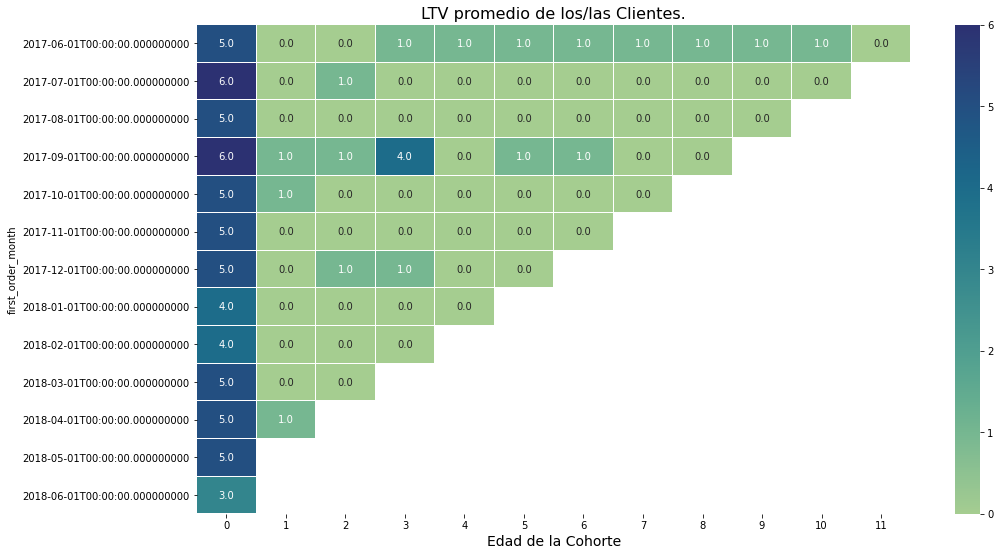

In [64]:
# se grafica un mapa de calor a partir de result
plt.figure(figsize=(16, 9))

sns.heatmap(result, annot=True, fmt='0.1f', cmap="crest", linewidth=.01)

plt.title('LTV promedio de los/las Clientes.', fontsize= 16)
plt.xlabel('Edad de la Cohorte', fontsize= 14)


plt.show()

In [65]:
# se calcula el ltv total por cohorte
result.sum(axis=1).round().sort_values(ascending= False)

first_order_month
2017-09-01    14.0
2017-06-01    13.0
2017-07-01     7.0
2017-12-01     7.0
2017-10-01     6.0
2018-04-01     6.0
2017-08-01     5.0
2017-11-01     5.0
2018-03-01     5.0
2018-05-01     5.0
2018-01-01     4.0
2018-02-01     4.0
2018-06-01     3.0
dtype: float64

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
**Conclusiones:**  
En primer mes de vida de las cohortes es donde los/las clientes aportan más ganancias a la empresa, desués el ltv disminuye. En las cohortes de junio de 2017 aumenta a 1 en su mes 4 de vida y se mantiene hasta el mes 11 de vida, la cohorte de septimebre también aumenta su LTV a 4 en el mes 4 de vida. Las cohortes que aporta más ganancias es la de junio y septiembre de 2017.  
 
</span>
    
</div>

## Informe de Marketing <a id='informe_marketing'></a>

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
****  
Se calculan los gastos totales en publicidad del Datarame `costs_us`, después se unirá el resultado al DataFrame `report`. Luego se calcula cuánto dinero se gastó a lo largo del tiempo, enseguida se hará el calculo del costo de adquisción de clientes de cada una de las fuentes. Luego se calcula el ROMI dividiendo el LTV (cantidad total de dinero que un cliente aporta a la empresa) entre el CAC (el costo de atraer a cada cliente).
</span>
    
</div>

In [66]:
# se encuentra la suma total de los costos de marketing para cada mes y se guarda el resultado como monthly_costs
monthly_costs = costs_us.groupby(['dt', 'source_id'])['costs'].sum().reset_index()
monthly_costs.head()

,dt,source_id,costs
0,2017-06-01,1,75.20
1,2017-06-01,2,132.56
2,2017-06-01,3,349.38
3,2017-06-01,4,76.74
4,2017-06-01,5,73.24


In [67]:
# Agreguemos los datos sobre los costos al DataFrame 'report'
report_with_costs = pd.merge(report, monthly_costs, left_on= 'order_month', right_on= 'dt')
report_with_costs.head()


,first_order_month,n_buyers,order_month,revenue,age,ltv,dt,source_id,costs
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,2017-06-01,1,75.20
1,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,2017-06-01,2,132.56
2,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,2017-06-01,3,349.38
3,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,2017-06-01,4,76.74
4,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,2017-06-01,5,73.24


In [68]:
# Se agrupa el total de los costos de marketing a lo largo del tiempo
source_costs = report_with_costs.groupby('dt')['costs'].sum().sort_values(ascending= False)
source_costs

dt
2018-03-01    14372.80
2018-02-01    12408.84
2017-12-01     7435.05
2017-11-01     7418.46
2018-05-01     7164.72
2018-01-01     6868.72
2017-10-01     5186.20
2017-09-01     2155.04
2017-08-01     1526.97
2017-07-01      756.08
2017-06-01      735.26
Name: costs, dtype: float64

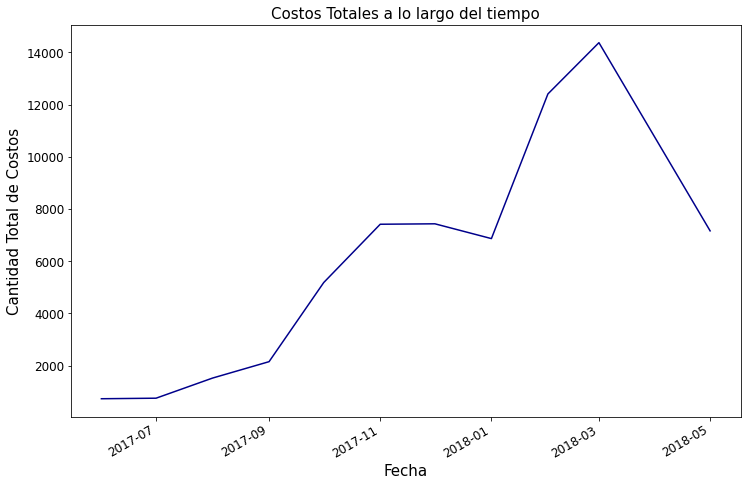

In [69]:
# se grafican los costos totales a los largo del tiempo
source_costs.plot(
                  kind= 'line',
                  figsize= [12,8],
                  fontsize= 12,
                  color= 'darkblue'
                       )
plt.title('Costos Totales a lo largo del tiempo', fontsize=15)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad Total de Costos', fontsize=15)

plt.show()

In [70]:
# Agregamos una columna para calcular el CAC (costo de adquisición de clientes/as)
report_with_costs['cac'] = report_with_costs['costs'] / report_with_costs['n_buyers']
report_with_costs.head()

,first_order_month,n_buyers,order_month,revenue,age,ltv,dt,source_id,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,2017-06-01,1,75.20,0.037173
1,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,2017-06-01,2,132.56,0.065526
2,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,2017-06-01,3,349.38,0.172704
3,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,2017-06-01,4,76.74,0.037934
4,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,2017-06-01,5,73.24,0.036204


In [71]:
# se agrupan la suma del costo de adquisición por la fuente del anuncio
cac_by_source = report_with_costs.groupby('source_id')['cac'].sum().sort_values(ascending= False)
cac_by_source

source_id
3     12.468799
5      4.501698
4      3.714151
2      3.518477
1      1.668647
9      0.512340
10     0.435064
Name: cac, dtype: float64

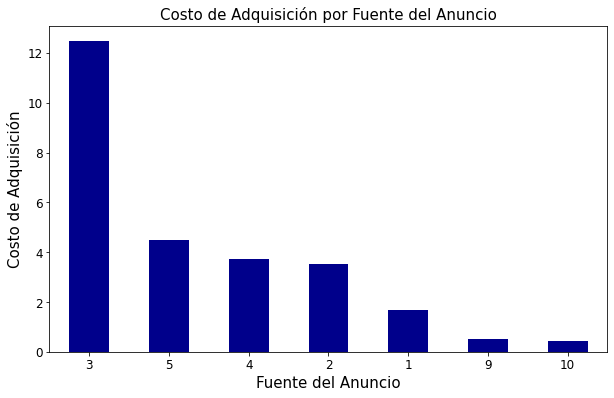

In [72]:
# se grafican el cac por fuente del anuncio
cac_by_source.plot(
                  kind= 'bar',
                  figsize= [10,6],
                  fontsize= 12,
                  rot= 0,
                  color= 'darkblue'
                       )
plt.title('Costo de Adquisición por Fuente del Anuncio', fontsize=15)
plt.xlabel('Fuente del Anuncio', fontsize=15)
plt.ylabel('Costo de Adquisición', fontsize=15)

plt.show()

In [73]:
# se calcula el ROMI (retorno de la inversión en marketing, o return on marketing investment en inglés) 
# se divide el LTV por el CAC
report_with_costs['romi'] = report_with_costs['ltv'] / report_with_costs['cac']
report_with_costs.head()

,first_order_month,n_buyers,order_month,revenue,age,ltv,dt,source_id,costs,cac,romi
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,2017-06-01,1,75.20,0.037173,127.094282
1,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,2017-06-01,2,132.56,0.065526,72.099351
2,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,2017-06-01,3,349.38,0.172704,27.355573
3,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,2017-06-01,4,76.74,0.037934,124.543784
4,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,2017-06-01,5,73.24,0.036204,130.495494


In [74]:
result_romi = report_with_costs.pivot_table(index='first_order_month', 
                             columns='age', 
                             values='romi', 
                             aggfunc='mean')

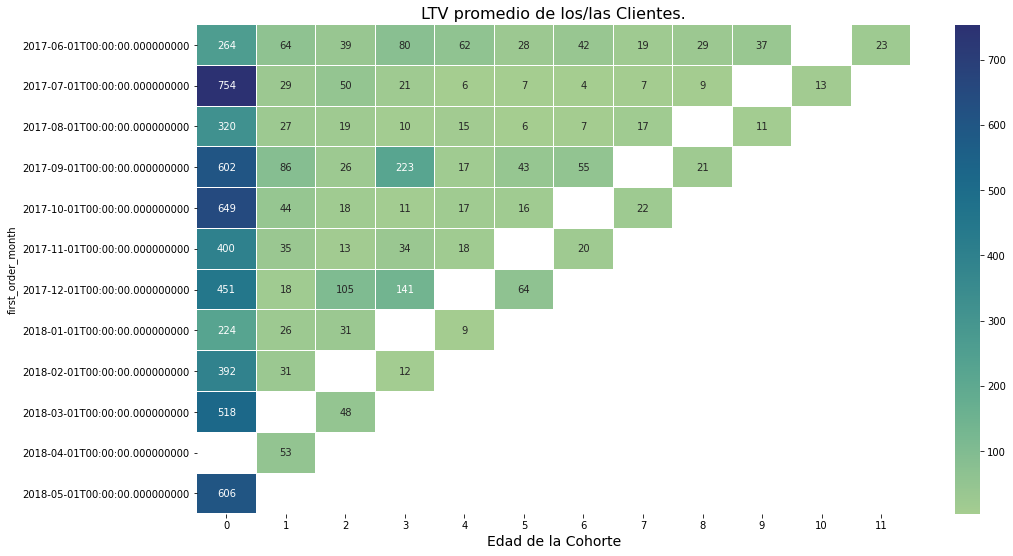

In [75]:
# se grafica un mapa de calor a partir de result_romi
plt.figure(figsize=(16, 9))

sns.heatmap(result_romi, annot=True, fmt='0.0f', cmap="crest", linewidth=.01)

plt.title('LTV promedio de los/las Clientes.', fontsize= 16)
plt.xlabel('Edad de la Cohorte', fontsize= 14)


plt.show()

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
**Conclusiones:**  
El total de dinero gastado fue en el mes de marzo y febrero de 2018, con 14,372 y 12,408, respectivmente; los meses con menor gasto fueron julio y junio de 2017 con 756 y 735, respectivamente.  
El costo de atraer a cada cliente por fuente de anuncio fueron la 3, 5 y 4 con 12.5, 4.5 y 3.8, respectivamente.  
El ROMI, nos dice la rentabilidad de la inversión en marketing, en el primer mes de vida en todas las cohortes se recuperaron los gastos e incluso generaron un beneficio muy alto.  Las cohortes que generaron un mayor beneficio fueron las de julio, septiembre, octubre de 2017 y las de marzo y mayo del 2018. Después del primer ciclo de vida el ROMI es menor, sin embargo, los gastos en publicidad se recuperaron.
 
</span>
    
</div>

## Resumen y Conclusión General <a id='end'></a>

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">
    
**Resumen General de los pasos seguidos:**  
1. Se descargaron los datos y se prepararon para el análisis.  
2. Se almacenaron los datos de visitas, pedidos y gastos.  
3. Se optimizaron los datos para el análisis, que cada columna contenga el tipo de datos correcto.  
4. Se buscaron valores ausentes y duplicados.    
5. Se hicieron los cálculos correspondientes para el informe del producto, el número de usuarios activos por día, semana y mes, la cantidad de sesiones por usuario, la duración de las sesiones en minutos.  
6. Para el informe de ventas se calculo el tiempo que transcurre entre el registro del usuario/usuaria y su primera compra (tiempo de conversión), luego se categorizaron de acuerdo al tiempo de conversión.   
7. Después se calcularon el total de pedidos por mes y el promedio de pedidos por usuario/usuaria., también se calculó el LTV.  8. Para el informe de marketing se calcularon los gastos totales y cuaánto se gastó a lo largo del tiempo. Después se calculó el costo de adquisición de los/las clientes y el ROMI .  

    
</span>

</div>

<div style="background-color: lightyellow; padding: 10px;">


<span style="color: darkblue;">
    
**Conclusión General:**  
1. La cantidad de usuarios activos diarios, semanales y mensuales muestra una participación constante (908, 5,825 y 23,228, respectivamente), sin embargo, el factor de adherencia semanal y mensual es bajo, de 0.155 y 0.039, respectivamente. Por tanto, hay área de oportunidad para incrementar dicho valor, si es lo que se desea.  
    
2. La duración promedio de las sesiones es de 1 minuto, no obstante, hay algunos valores atípicos que requieren revisión para determinar si son errores o sesiones dejadas abiertas.  
    
3. La mayoría de las conversiones (primeros pedidos de las/los clientes), sin embargo, hay usuarios y usuarias que hacen el primer pedido  hasta los 4 meses. Por lo que se puede sugerir hacer unainvestigación por que dichos clientes tardan 4 meses en hacer su primer pedido.  
    
4. El análisis de cohortes revela algunos patrones de comportamiento de acuerdo a la fuente de anuncios, sugiriendo oportunidades para centrar esfuerzos en fuentes más efectivas, que son las 4, 3 y 5.  
    
5. La cantidad de pedidos es más alta en los meses festivos como octubre, noviembre y diciembre, siendo diciembre el mes con más pedidos con 6,000 aproximadamente.  
    
6. El LTV alcanza su punto máximo en el primer mes de vida de las cohortes y disminuye con el tiempo, destacando la importancia de las primeras interacciones con los clientes.  
    
7. Los meses de marzo y febrero de 2018 registraron el mayor gasto en publicidad, mientras que en julio y junio de 2017 tuvieron los gastos más bajos.  
    
8. El costo de adquisición por cliente varía entre el tipo de fuentes de anuncios, destacando las fuentes 3, 5 y 4 como más eficientes en términos de costos, las cuales coiciden o son las que tienen mayor cantidad de pedidos a lo largo del tiempo.  
    
9. Con base en el valor de ROMI indica una rentabilidad positiva en el primer mes de vida de las cohortes, pero disminuye en los ciclos posteriores. Sin embargo, se logran recuperar los gastos en publicidad, por tanto, la campaña de publicidad es bastante excepcional y sugiere fue altamente rentable.  
    
Con base en los resultados, se aprecia que hay una oportunidad para mejorar la retención de los usuarios, enfatizar las estrategias de marketing en las fuentes más efectivas que son las 3,4 y 5, y optimizar los costos de adquisición para mantener una buena rentabilidad.
    
 

    
</span>

</div>